In [16]:
import pandas as pd
import numpy as np
import math

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from matplotlib import pyplot as pp

In [29]:
#load dataset
dataset = pd.read_csv('malaria.csv')
print (len(dataset))
#dataset.Type.value_counts().plot(kind='bar')
print (dataset)

76
     id     H1  H2   H3    H4   H5   H6  H7  Hasil Citra
0     0  18393   2  168  62.0  110   80   1            1
1     1  20228   1  156  85.0  140   90   2            1
2     2  18857   1  165  64.0  130   70   2            1
3     3  17623   2  169  82.0  150  100   1            1
4     4  17474   1  156  56.0  100   60   1            1
..  ...    ...  ..  ...   ...  ...  ...  ..          ...
71   96  21874   2  179  95.0  150   90   1            1
72   97  23433   1  156  58.0  110   70   1            1
73   98  16039   2  180  90.0  140   90   2            2
74   99  20484   1  158  75.0  130   90   1            1
75  100  21934   1  157  77.0  140   90   1            1

[76 rows x 9 columns]


In [30]:
#replace NaN
zero_not_accepted = [ 'H1', 'H2', 'H3', 'H4', 'H5', 'H6', 'H7' ]

for colum in zero_not_accepted:
   # dataset [colum] = dataset[colum].replace(0, np.NaN)
    mean = int(dataset[colum].mean(skipna=True))
    dataset[colum] = dataset[colum].replace(np.NaN, mean)

In [31]:
#split target and attribute
x = dataset.iloc[:, 1:7]
y = dataset.iloc[:, 7]
#split train n test dataset
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=0, test_size=0.1)
print(len(y_test))
print(len(x_train))
print(len(dataset))
y

8
68
76


0     1
1     2
2     2
3     1
4     1
     ..
71    1
72    1
73    2
74    1
75    1
Name: H7, Length: 76, dtype: int64

Text(0.5, 1.0, 'testing')

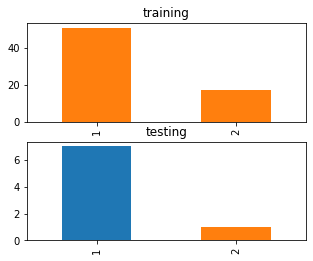

In [32]:
x_train
x_test
y_train
len(y_test)

pp.figure(figsize=(5,4))
pp.subplot(2,1,1);y_train.value_counts().plot(kind='bar', color=['C1','C1','C2','C3','C4','C5','C6']);pp.title('training')
pp.subplot(2,1,2);y_test.value_counts().plot(kind='bar', color=['C0','C1','C2','C3','C4','C5','C6']);pp.title('testing')

In [33]:
#scaling data
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)
x_train

array([[ 1.05908724,  1.27097782,  1.08883992,  0.5865244 ,  0.74241119,
         0.87217787],
       [ 1.32474625,  1.27097782,  1.7173723 ,  1.48201242,  0.16872982,
         0.87217787],
       [ 0.48816786,  1.27097782, -0.67105075, -0.7222658 , -0.40495156,
        -1.92977939],
       [ 0.43660361, -0.78679579, -0.04251837, -0.6533821 ,  3.03713669,
         0.87217787],
       [-0.4531891 , -0.78679579,  1.7173723 , -0.37784732, -0.97863293,
        -0.06180788],
       [ 0.19610794, -0.78679579, -0.9224637 , -0.79114949, -0.97863293,
        -0.99579363],
       [ 0.5277692 , -0.78679579, -0.54534427, -0.03342885,  0.16872982,
         0.405185  ],
       [ 0.15114392, -0.78679579, -1.55099608,  0.17322223,  1.88977394,
         1.80616363],
       [-0.53115424, -0.78679579, -0.67105075,  0.31098962, -0.40495156,
        -0.06180788],
       [-1.37268281, -0.78679579,  0.71172049, -0.30896363, -0.40495156,
        -0.99579363],
       [-0.11038996, -0.78679579, -0.67105075, -1.

In [34]:
math.sqrt(len(y_test))

2.8284271247461903

In [35]:
#choose method and fitting
classifier = KNeighborsClassifier(n_neighbors=3,p=2,metric='euclidean')
classifier.fit (x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [36]:
#testing fsts
y_pred = classifier.predict(x_test)
y_pred

array([2, 1, 2, 1, 1, 1, 2, 1], dtype=int64)

In [37]:
#print result
cm = confusion_matrix(y_test, y_pred)
print (cm)
print("Akurasi :" , accuracy_score(y_test, y_pred))
print("presisi :" , precision_score(y_test, y_pred, average=None))
print("recall :" , recall_score(y_test, y_pred, average=None))
print("F-Measure :" , f1_score(y_test, y_pred, average=None))

[[5 2]
 [0 1]]
Akurasi : 0.75
presisi : [1.         0.33333333]
recall : [0.71428571 1.        ]
F-Measure : [0.83333333 0.5       ]


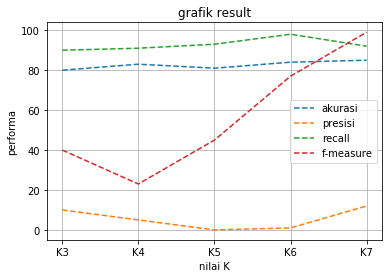

In [38]:
from matplotlib import pyplot as plt
x = ["K3", "K4", "K5", "K6", "K7"]
a = [80, 83, 81, 84, 85]
p = [10, 5, 0, 1, 12]
r = [90, 91, 93, 98, 92]
f = [40, 23, 45, 77, 99]
plt.plot(x, a, '--')
plt.plot(x, p, '--')
plt.plot(x, r, '--')
plt.plot(x, f, '--')
plt.title("grafik result")
plt.xlabel("nilai K")
plt.ylabel("performa")
plt.legend(["akurasi", "presisi", "recall", "f-measure"])
plt.grid()
plt.show()